In [354]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings; warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [355]:
#making necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path

In [356]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [357]:
# train.set_index('date', inplace=True)
train.drop(columns = ['id', 'onpromotion'],inplace = True)
train.head()

,date,store_nbr,family,sales
0,2013-01-01,1,AUTOMOTIVE,0.0
1,2013-01-01,1,BABY CARE,0.0
2,2013-01-01,1,BEAUTY,0.0
3,2013-01-01,1,BEVERAGES,0.0
4,2013-01-01,1,BOOKS,0.0


## Converting to pandas datetime format

In [358]:
pd.to_datetime(train["date"])

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3000883   2017-08-15
3000884   2017-08-15
3000885   2017-08-15
3000886   2017-08-15
3000887   2017-08-15
Name: date, Length: 3000888, dtype: datetime64[ns]

In [359]:
train['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
train['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
train['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
train['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
train['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

In [360]:
train.groupby('family')['sales'].mean().sort_values()

family
Tools                4.865350
Food                33.214082
LifeStyle           37.496484
Home                43.361973
PREPARED FOODS      96.770202
FROZEN FOODS       154.766954
Daily              218.277791
MEATS              341.849965
POULTRY            350.532292
BREAD/BAKERY       463.336254
DAIRY              709.154889
CLEANING          1072.416744
PRODUCE           1349.352123
BEVERAGES         2385.793151
GROCERY I         3776.972100
Name: sales, dtype: float64

In [361]:
grocery = train[train['family'] == 'GROCERY I']
beverages = train[train['family'] == 'BEVERAGES']
meat = train[train['family'] == 'MEATS']

In [362]:
grocery = grocery.groupby(by=['date']).sum()
beverages = beverages.groupby(by=['date']).sum()
meat = meat.groupby(by=['date']).sum()

# dropping store number
grocery.drop(columns=['store_nbr'], inplace=True)
beverages.drop(columns=['store_nbr'], inplace=True)
meat.drop(columns=['store_nbr'], inplace=True)

In [363]:
grocery_train = grocery.loc[:'2016-12-31']
grocery_test = grocery.loc['2016-12-31':]

beverages_train = beverages.loc[:'2016-12-31']
beverages_test = beverages.loc['2016-12-31':]

meat_train = meat.loc[:'2016-12-31']
meat_test = meat.loc['2016-12-31':]

In [364]:
grocery_train.reset_index(inplace = True)
grocery_test.reset_index(inplace = True)
beverages_train.reset_index(inplace = True)
beverages_test.reset_index(inplace = True)
meat_train.reset_index(inplace = True)
meat_test.reset_index(inplace = True)

In [365]:
productsdf = [grocery_train,beverages_train,meat_train]
productsdftest = [grocery_test,beverages_test,meat_test]
products = ["grocery","beverages","meat"]
products[0]

'grocery'

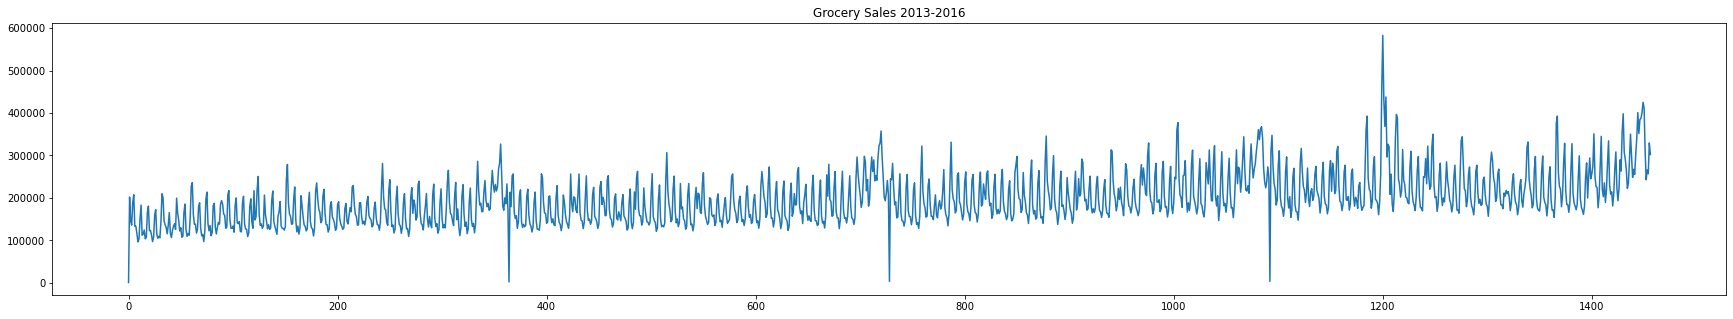

In [366]:
plt.figure(figsize = (30,5))
plt.title("Grocery Sales 2013-2016")
plt.plot(grocery_train["sales"])

plot has slightly sloped general upward trend, so probably not stationary as mean will not be constant with time. also there is a hint of downward spikes that seem to repeat after around a year, so this hints at a presence of seasonality.
so a deterministic trend with a linear-cyclic hybrid model should perhaps be implemented must be considered.

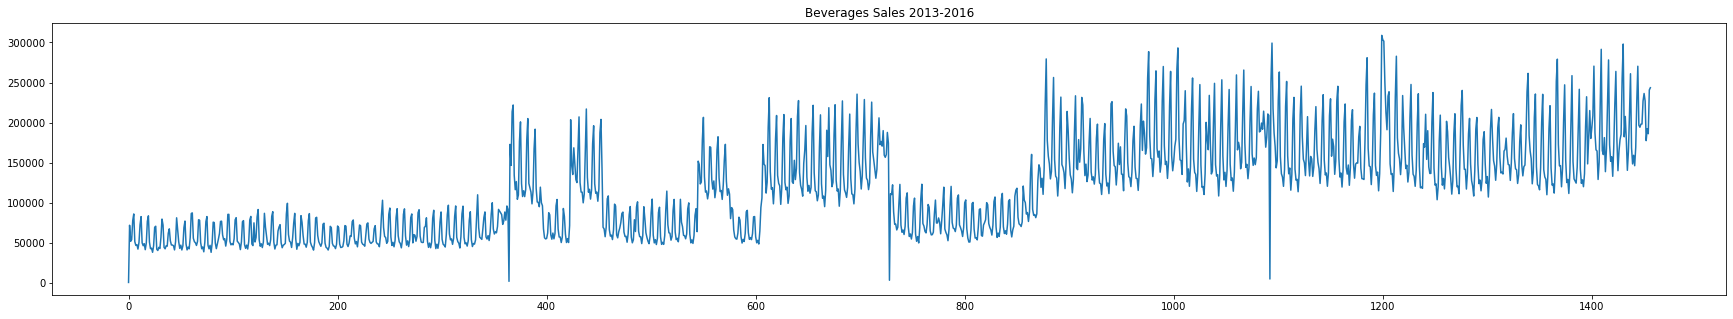

In [367]:
plt.figure(figsize = (30,5))
plt.title("Beverages Sales 2013-2016")
plt.plot(beverages_train["sales"])

none of the mean and variance seem constant over time. so no hint of stationarity

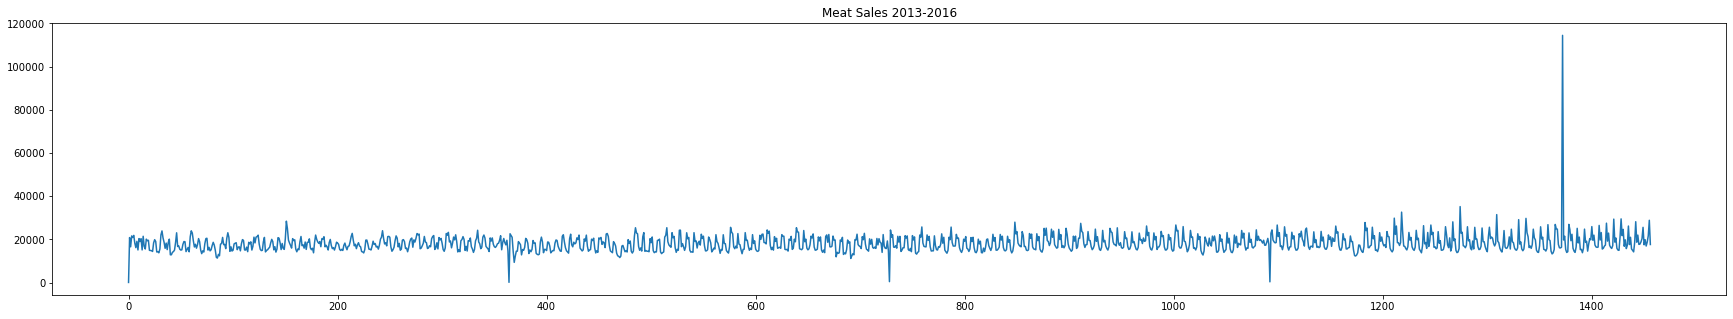

In [368]:
plt.figure(figsize = (30,5))
plt.title("Meat Sales 2013-2016")
plt.plot(meat_train["sales"])

has the yearly repeating downward spikes but the data looks mostly stationary

## to center all the data around horizontal axis, mean of each dataset is deducted from all:

In [369]:
"""
for i in range(3):
    productsdf[i]["sales_uncentered"] = productsdf[i]["sales"].copy()
    productsdf[i]["sales"] = productsdf[i]["sales"] - productsdf[i]["sales"].mean()
    """
for i in range(3):
    productsdf[i]["day"] = list(productsdf[i].index)
    productsdf[i]["day"] += 1 
    
for i in range(3):
    productsdftest[i]["day"] = list(productsdftest[i].index)
    productsdftest[i]["day"] += 1 
    


In [370]:
'''
grocery_train.to_csv("grocery_train.csv")
grocery_test.to_csv("grocery_test.csv")

beverages_train.to_csv("beverages_train.csv")
beverages_test.to_csv("beverages_test.csv")

meat_train.to_csv("meat_train.csv")
meat_test.to_csv("meat_test.csv")
'''


'\ngrocery_train.to_csv("grocery_train.csv")\ngrocery_test.to_csv("grocery_test.csv")\n\nbeverages_train.to_csv("beverages_train.csv")\nbeverages_test.to_csv("beverages_test.csv")\n\nmeat_train.to_csv("meat_train.csv")\nmeat_test.to_csv("meat_test.csv")\n'

### ols for linear-seasonal model for grocery: $y_{t}=\beta_{0}+\beta_{1}t+\beta_{3}cos(2\pi ft)+\beta_{4}sin(2\pi ft)$
### set f = 15days to account for bi-weekly wage in-flow

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          2.44e-104
Time:                        07:51:11   Log-Likelihood:                -17839.
No. Observations:                1457   AIC:                         3.569e+04
Df Residuals:                    1453   BIC:                         3.571e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.419e+05   2638.701     53.783      0.0

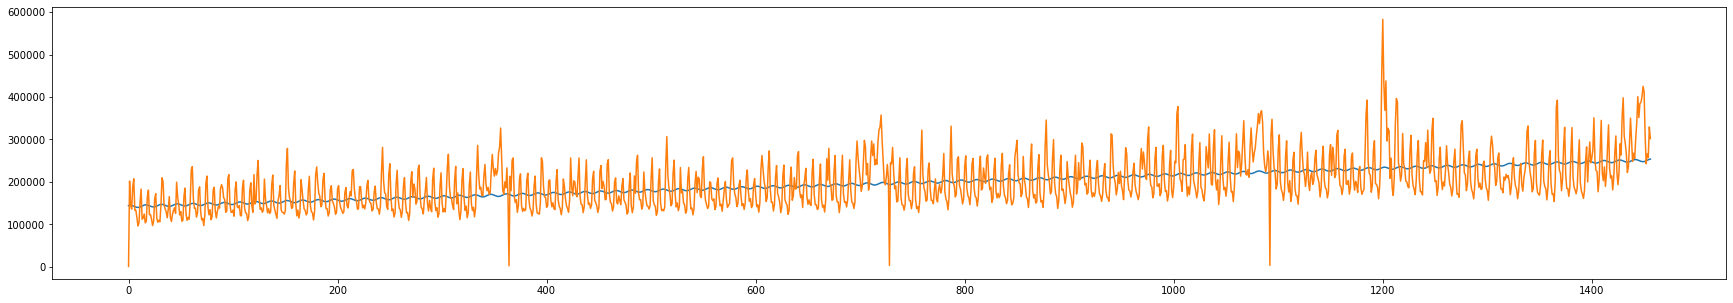

In [371]:
import statsmodels.api as sm
grtr_linear = grocery_train.copy()
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y,X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(grtr_linear["sales"])
plt.show()


In [372]:
grtr_lin["est"]

NameError: name 'grtr_lin' is not defined

## trying out for meat and beverage: 

In [ ]:
import statsmodels.api as sm
grtr_linear = beverages_train.copy()
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y,X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]


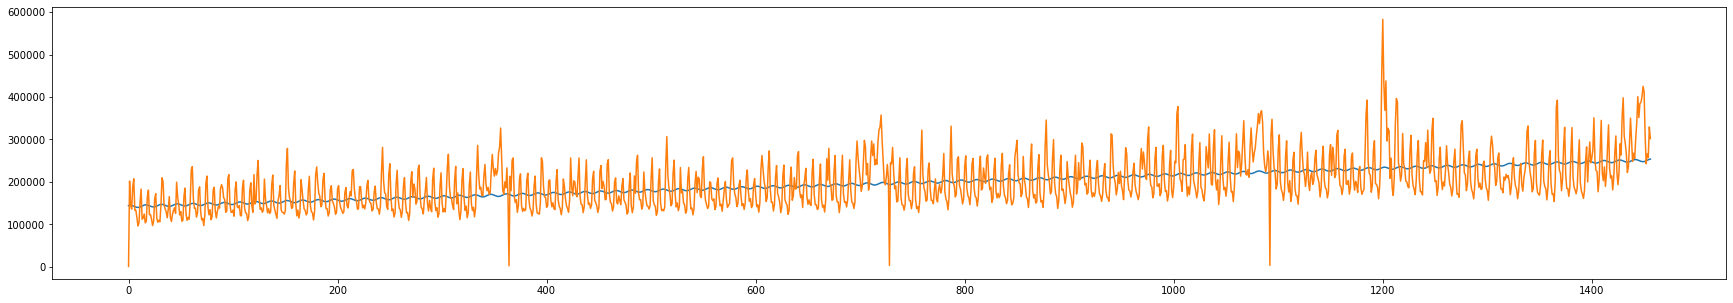

In [373]:
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(grtr_linear["sales"])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     11.98
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           9.51e-08
Time:                        07:51:23   Log-Likelihood:                -14229.
No. Observations:                1457   AIC:                         2.847e+04
Df Residuals:                    1453   BIC:                         2.849e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.708e+04    221.433     77.123      0.0

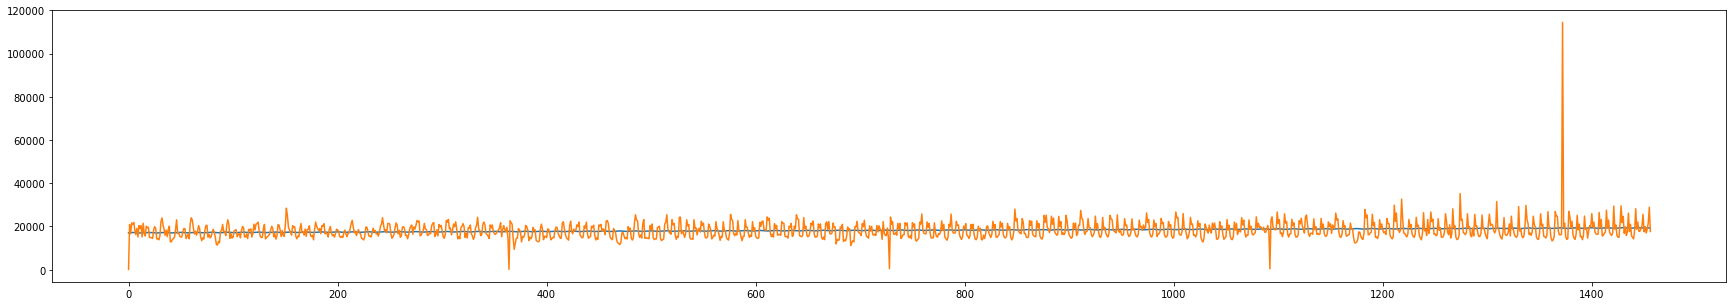

In [374]:
import statsmodels.api as sm
grtr_linear = meat_train.copy()
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y,X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(grtr_linear["sales"])
plt.show()

## apply some differencing and log transform:
### ols for linear-seasonal model for grocery: $y_{t}=\beta_{0}+\beta_{1}t+\beta_{3}cos(2\pi ft)+\beta_{4}sin(2\pi ft)+\beta_{5}y_{t-365}$
### set f = 15days to account for bi-weekly wage in-flow

In [375]:
grtr_linear = grocery_train.copy()
grtr_linear["y365"] = grtr_linear["sales"].shift(365)
grtr_linear.dropna(inplace = True)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          2.01e-127
Time:                        07:51:26   Log-Likelihood:                -13269.
No. Observations:                1093   AIC:                         2.655e+04
Df Residuals:                    1088   BIC:                         2.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.224e+04   5419.175     11.486      0.0

<Figure size 2160x360 with 0 Axes>

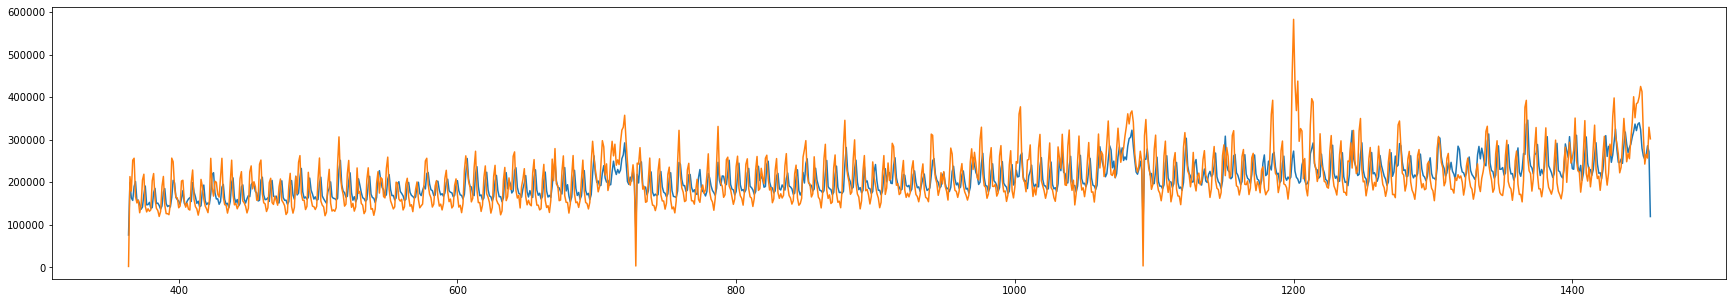

In [376]:
grtr_linear = grocery_train.copy()
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]+result_lin.params[4]*grtr_linear["y365"]
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     364.0
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          6.73e-199
Time:                        07:51:28   Log-Likelihood:                 77.481
No. Observations:                1093   AIC:                            -145.0
Df Residuals:                    1088   BIC:                            -120.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3943      0.226     19.417      0.0

<Figure size 2160x360 with 0 Axes>

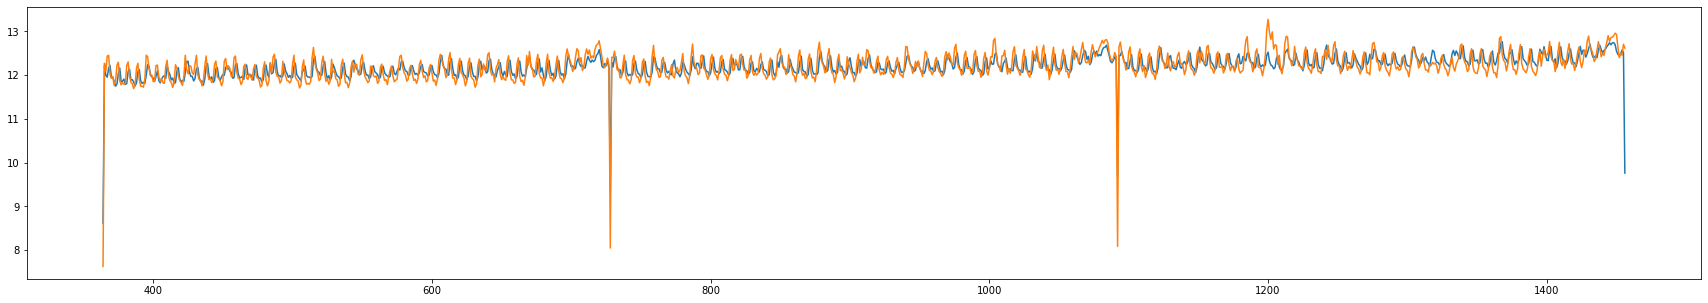

In [377]:
grtr_linear = grocery_train.copy()
grtr_linear["sales"]= np.log(grtr_linear["sales"])
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]+result_lin.params[4]*grtr_linear["y365"]
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     700.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.24e-119
Time:                        07:51:30   Log-Likelihood:                -13296.
No. Observations:                1093   AIC:                         2.660e+04
Df Residuals:                    1091   BIC:                         2.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.623e+04   5194.533     14.676      0.0

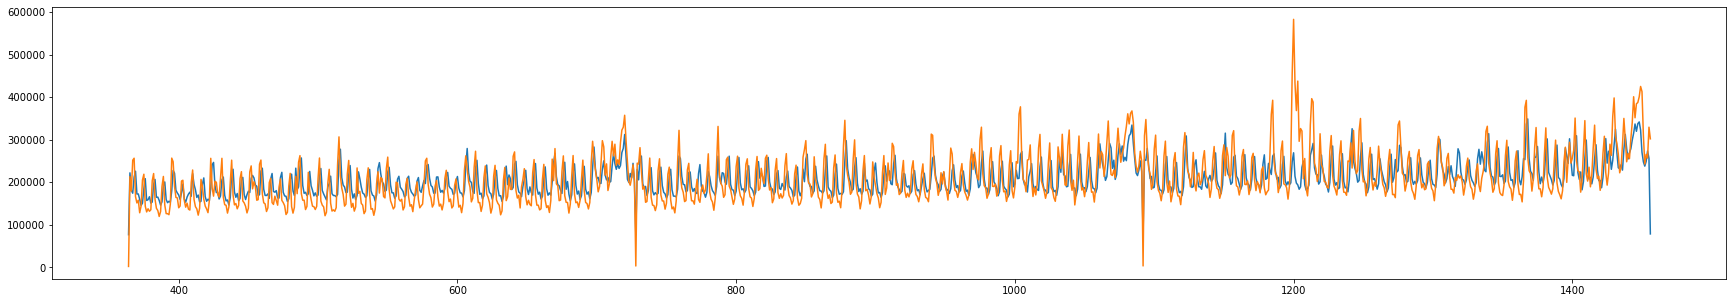

In [378]:
grtr_linear = grocery_train.copy()
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["y365"])
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()

In [379]:
grtr_linear["sales"]= np.log(grtr_linear["sales"])


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1365.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.81e-194
Time:                        07:51:31   Log-Likelihood:                 56.793
No. Observations:                1093   AIC:                            -109.6
Df Residuals:                    1091   BIC:                            -99.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0099      0.222     18.073      0.0

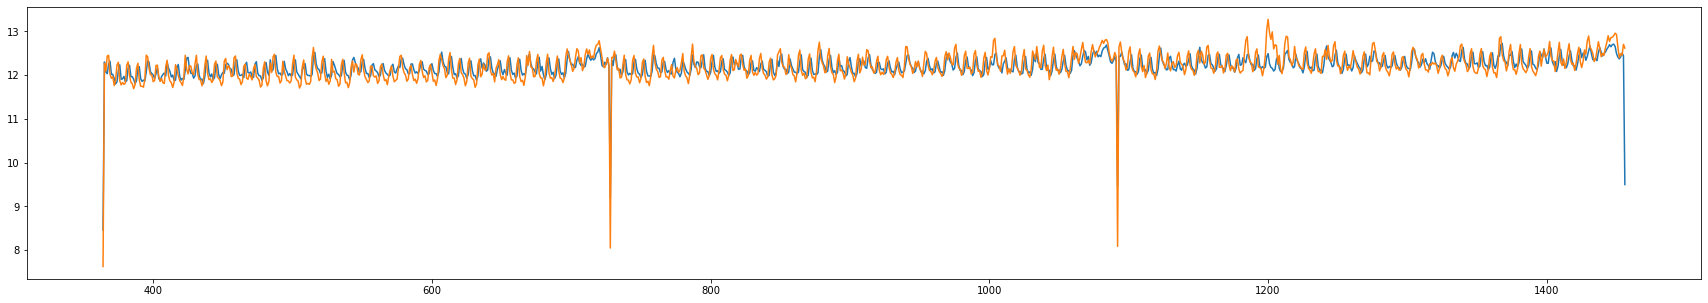

In [380]:

grtr_linear = grocery_train.copy()
grtr_linear["sales"]= np.log(grtr_linear["sales"])
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["y365"])
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()

In [381]:
import warnings; warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


# initiating tests for: groceries

Model: $y_{t}=\beta_{0}+\beta_{1}$

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     266.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           8.17e-54
Time:                        07:51:34   Log-Likelihood:                -13448.
No. Observations:                1093   AIC:                         2.690e+04
Df Residuals:                    1091   BIC:                         2.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.324e+05   4934.504     26.837      0.0

<Figure size 2160x360 with 0 Axes>

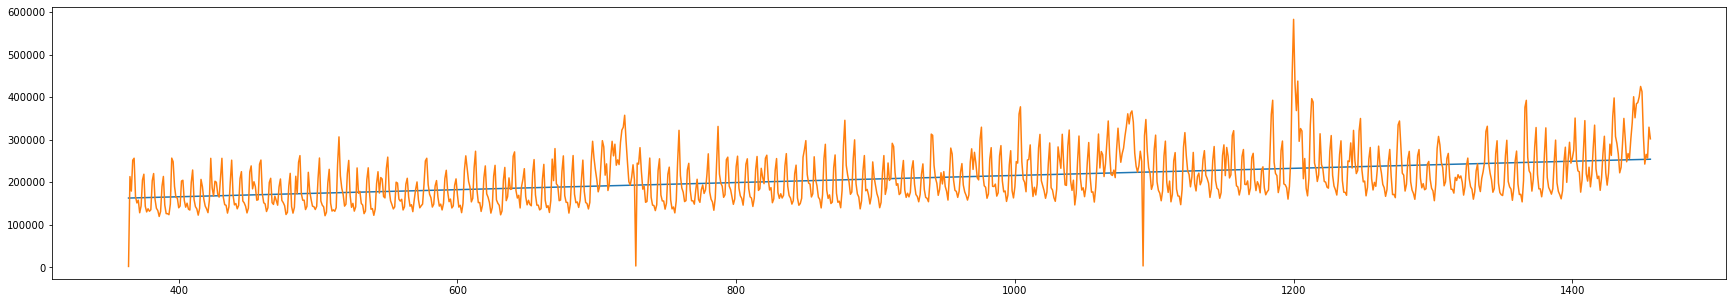

mean_squared_error: 2845330211.047445


In [382]:
grtr_linear = grocery_train.copy()
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]
                           )
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y,grtr_linear["estimate"])))

### ols for linear-seasonal model for grocery: $y_{t}=\beta_{0}+\beta_{1}t+\beta_{3}cos(2\pi f_{1}t)+\beta_{4}sin(2\pi f_{1}t)+\beta_{5}cos(2\pi f_{2}t)+\beta_{6}sin(2\pi f_{2}t)$
### set $f_{1}$ = 15days to account for bi-weekly wage in-flow
### set $f_{2}$ = 364 days to account for yearly seasonality

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     120.9
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          4.14e-107
Time:                        07:51:34   Log-Likelihood:                -17828.
No. Observations:                1457   AIC:                         3.567e+04
Df Residuals:                    1451   BIC:                         3.570e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.417e+05   2658.300     53.318      0.0

<Figure size 2160x360 with 0 Axes>

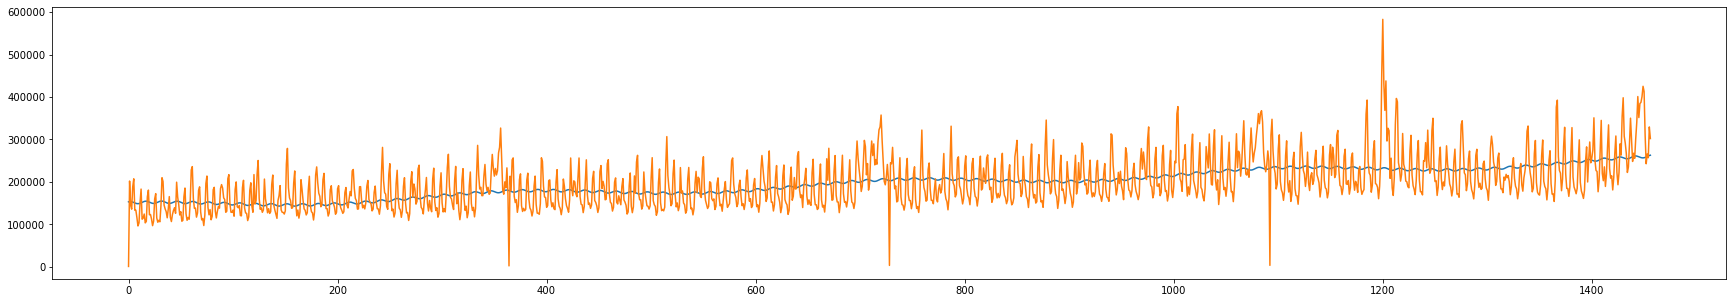

mean_squared_error: 2486115295.642784


In [383]:
grtr_linear = grocery_train.copy()

grtr_linear.dropna(inplace = True)
f1 = 15
f2 = 366
grtr_linear["cos1"] = np.cos(2*np.pi*(1/f1)*grtr_linear["day"])
grtr_linear["sin1"] = np.sin(2*np.pi*(1/f1)*grtr_linear["day"])
grtr_linear["cos2"] = np.cos(2*np.pi*(1/f2)*grtr_linear["day"])
grtr_linear["sin2"] = np.sin(2*np.pi*(1/f2)*grtr_linear["day"])
X = grtr_linear[["day","cos1","sin1","cos2","sin2"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y,X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]
                           +result_lin.params[2]*grtr_linear["cos1"]+result_lin.params[3]*grtr_linear["sin1"]
                           +result_lin.params[4]*grtr_linear["cos2"]+result_lin.params[5]*grtr_linear["sin2"])
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y)
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y,grtr_linear["estimate"])))

### ols for linear-seasonal model for grocery: $y_{t}=\beta_{0}+\beta_{1}t+\beta_{3}cos(2\pi f_{1}t)+\beta_{4}sin(2\pi f_{1}t)+\beta_{5}y_{t-364}$
### set f = 15days to account for bi-weekly wage in-flow
### shift tried 365,366 but ended up on 364

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          2.01e-127
Time:                        07:51:35   Log-Likelihood:                -13269.
No. Observations:                1093   AIC:                         2.655e+04
Df Residuals:                    1088   BIC:                         2.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.224e+04   5419.175     11.486      0.0

<Figure size 2160x360 with 0 Axes>

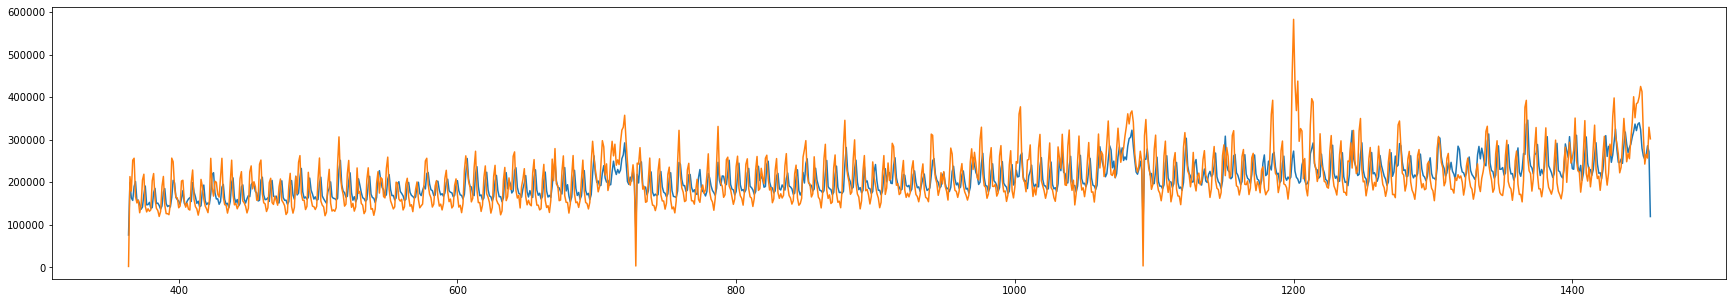

mean_squared_error: 2050657475.1886632


In [384]:
grtr_linear = grocery_train.copy()
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]+result_lin.params[4]*grtr_linear["y365"]
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y,grtr_linear["estimate"])))

## apply log transform:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     364.0
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          6.73e-199
Time:                        07:51:35   Log-Likelihood:                 77.481
No. Observations:                1093   AIC:                            -145.0
Df Residuals:                    1088   BIC:                            -120.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3943      0.226     19.417      0.0

<Figure size 2160x360 with 0 Axes>

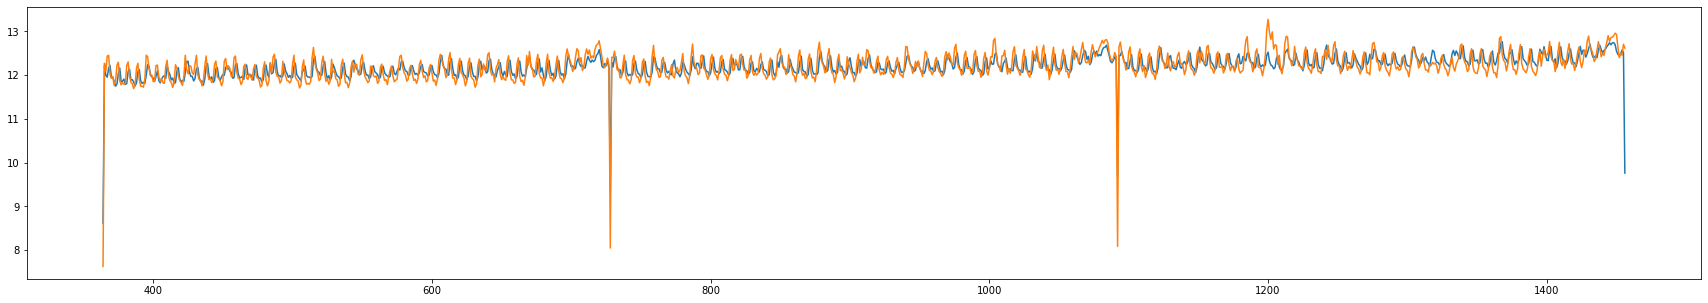

mean_squared_error: 0.05081042896050679


In [385]:
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]+result_lin.params[4]*grtr_linear["y365"]
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y.fillna(0),grtr_linear["estimate"])))

### ols for linear-seasonal model for grocery: $y_{t}=\beta_{0}+\beta_{1}t+\beta_{2}y_{t-15}+\beta_{3}y_{t-364}$
### shift 15days to account for bi-weekly wage in-flow
### shift tried 365,366 but ended up on 364

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     487.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          7.77e-201
Time:                        09:22:51   Log-Likelihood:                 78.773
No. Observations:                1093   AIC:                            -149.5
Df Residuals:                    1089   BIC:                            -129.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7829      0.303     15.811      0.0

<Figure size 2160x360 with 0 Axes>

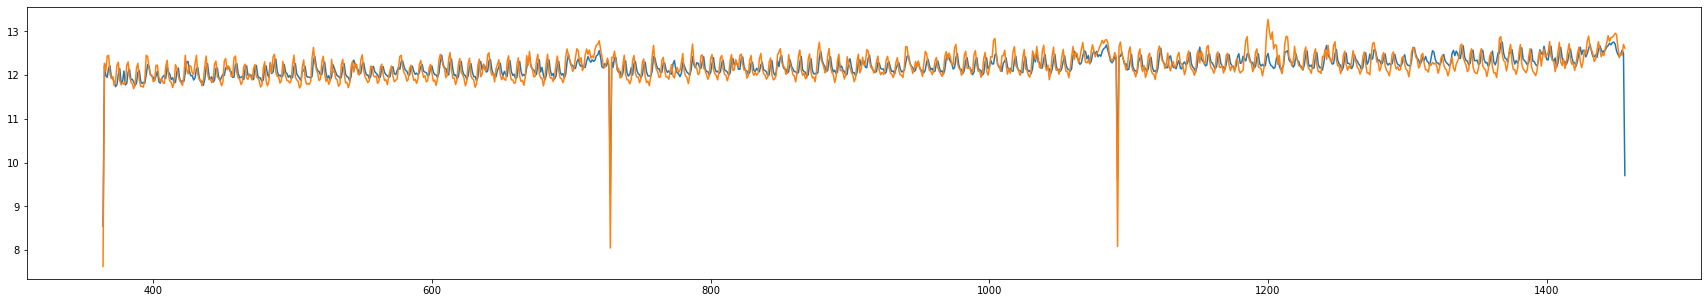

mean_squared_error: 0.05069042601777997


In [401]:
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["y15"] = grtr_linear["sales"].shift(15)
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
X = grtr_linear[["day","y15","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]
                           +result_lin.params[2]*grtr_linear["y15"]+result_lin.params[3]*grtr_linear["y365"])
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y.fillna(0),grtr_linear["estimate"])))

### checking stationarity of log transformed deterministic model:

In [402]:
test = "grocery sales data"
df = grocery_train["sales"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

AUGMENTED DICKEY-FULLER TEST for: grocery sales data
Test statistic = -2.968
P-value = 0.038
Critical values :
	1%: -3.434921564946909 - The data is not stationary with 99% confidence
	5%: -2.8635590328954197 - The data is  stationary with 95% confidence
	10%: -2.567844919904611 - The data is  stationary with 90% confidence


In [403]:
test = "log transformed determininstic"
df = grtr_linear["estimate"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

AUGMENTED DICKEY-FULLER TEST for: log transformed determininstic
Test statistic = -2.960
P-value = 0.039
Critical values :
	1%: -3.436470487817901 - The data is not stationary with 99% confidence
	5%: -2.8642424166404 - The data is  stationary with 95% confidence
	10%: -2.5682088634756735 - The data is  stationary with 90% confidence


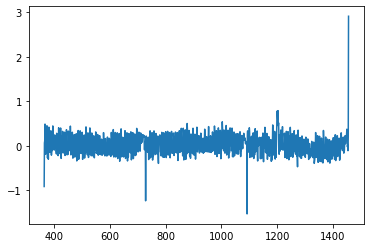

AUGMENTED DICKEY-FULLER TEST for: residuals of SARIMAX(0, 1, 2)x(0, 1, 2, 7) for bread sales 
Test statistic = -3.072
P-value = 0.029
Critical values :
	1%: -3.4364762217105844 - The data is not stationary with 99% confidence
	5%: -2.8642449457774135 - The data is  stationary with 95% confidence
	10%: -2.5682102104987337 - The data is  stationary with 90% confidence
 
Figure(432x288)
Figure(432x288)


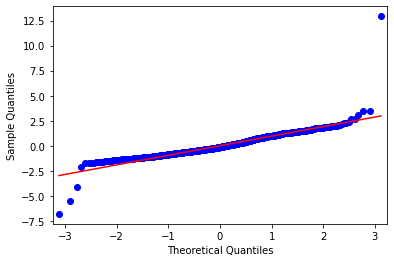

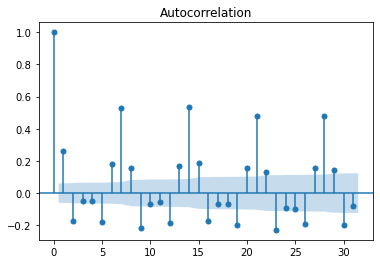

In [404]:
residual = (y.fillna(0) - grtr_linear["estimate"])
plt.plot(residual)
plt.show()
from statsmodels.graphics.api import qqplot



test = "residuals of SARIMAX(0, 1, 2)x(0, 1, 2, 7) for bread sales "
df = residual
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")
print(qqplot(residual, line="q", fit=True))
print(sm.graphics.tsa.plot_acf(residual))

# Initiating test for meat

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     263.1
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          2.16e-128
Time:                        07:51:38   Log-Likelihood:                -13269.
No. Observations:                1093   AIC:                         2.655e+04
Df Residuals:                    1089   BIC:                         2.657e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.163e+04   5834.376     10.563      0.0

<Figure size 2160x360 with 0 Axes>

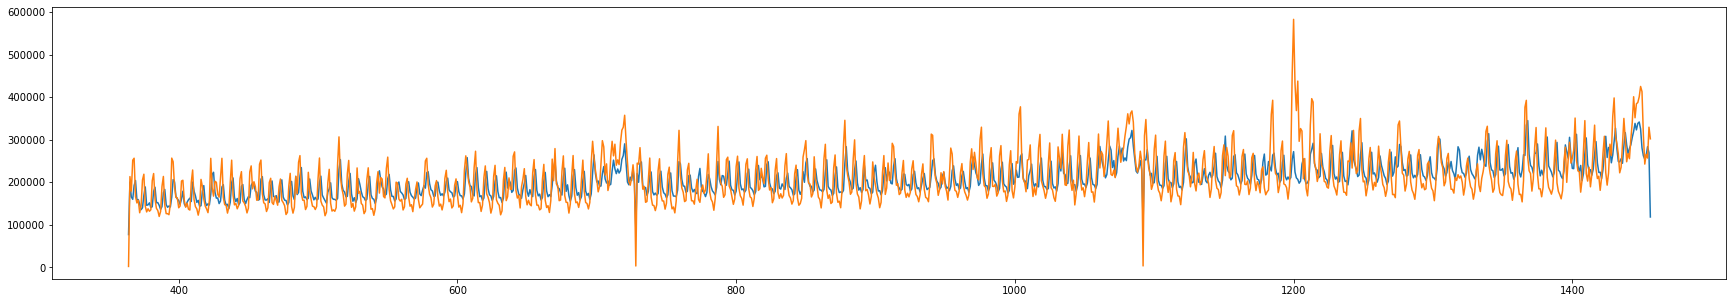

mean_squared_error: 2053074417.3173363


In [389]:
grtr_linear = grocery_train.copy()
#grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["y15"] = grtr_linear["sales"].shift(15)
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
X = grtr_linear[["day","y15","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]
                           +result_lin.params[2]*grtr_linear["y15"]+result_lin.params[3]*grtr_linear["y365"])
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y.fillna(0),grtr_linear["estimate"])))

# log transformed seasonal model with AR at lag 365 and lag 1
 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     309.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          2.78e-145
Time:                        07:51:38   Log-Likelihood:                 147.22
No. Observations:                1093   AIC:                            -286.4
Df Residuals:                    1089   BIC:                            -266.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2424      0.268     15.801      0.0

<Figure size 2160x360 with 0 Axes>

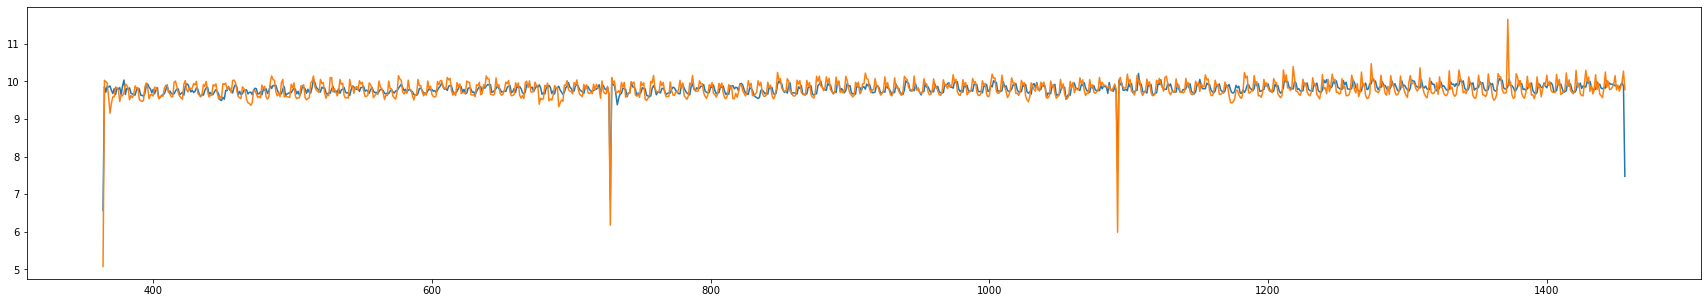

mean_squared_error: 0.04472348032564581


In [390]:
grtr_linear = meat_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["y15"] = grtr_linear["sales"].shift(15)
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
X = grtr_linear[["day","y15","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]
                           +result_lin.params[2]*grtr_linear["y15"]+result_lin.params[3]*grtr_linear["y365"])
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y.fillna(0),grtr_linear["estimate"])))

In [ ]:
residual = (y.fillna(0) - grtr_linear["estimate"])
plt.plot(residual)
plt.show()
from statsmodels.graphics.api import qqplot



test = "residuals of SARIMAX(0, 1, 2)x(0, 1, 2, 7) for bread sales "
df = residual
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")
print(qqplot(residual, line="q", fit=True))
print(sm.graphics.tsa.plot_acf(residual))

In [391]:
test = "real sales data"
df = grtr_linear["sales"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

AUGMENTED DICKEY-FULLER TEST for: real sales data
Test statistic = -6.209
P-value = 0.000
Critical values :
	1%: -3.4364647646486093 - The data is  stationary with 99% confidence
	5%: -2.864239892228526 - The data is  stationary with 95% confidence
	10%: -2.5682075189699822 - The data is  stationary with 90% confidence


In [392]:
test = "log transformed determininstic"
df = grtr_linear["estimate"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

AUGMENTED DICKEY-FULLER TEST for: log transformed determininstic
Test statistic = -4.237
P-value = 0.001
Critical values :
	1%: -3.436470487817901 - The data is  stationary with 99% confidence
	5%: -2.8642424166404 - The data is  stationary with 95% confidence
	10%: -2.5682088634756735 - The data is  stationary with 90% confidence


# Initiating test for beverages

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     135.4
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           6.17e-94
Time:                        07:51:41   Log-Likelihood:                -498.75
No. Observations:                1093   AIC:                             1008.
Df Residuals:                    1088   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0446      0.289     27.826      0.0

<Figure size 2160x360 with 0 Axes>

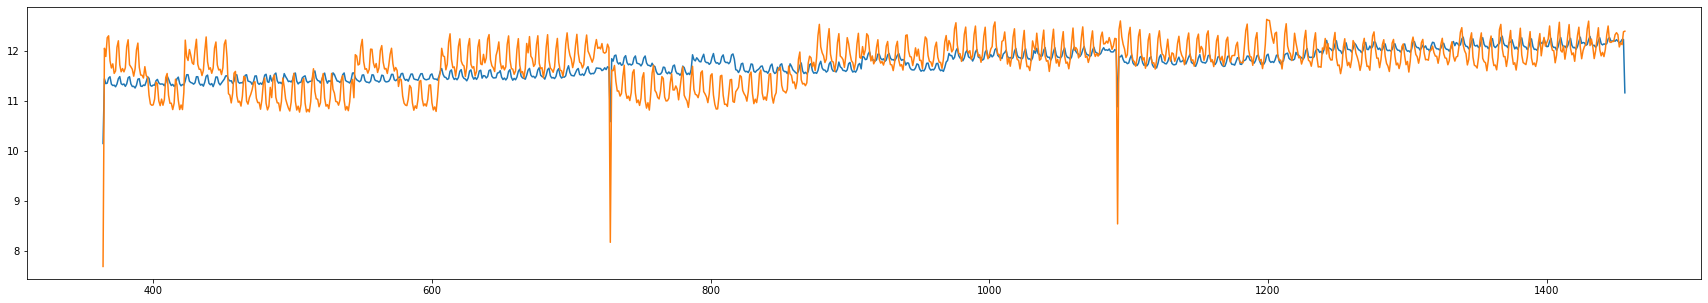

mean_squared_error: 0.14584034546108435


In [393]:
#log transformed seasonal model with AR at lag 365
grtr_linear = beverages_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
grtr_linear["cos"] = np.cos(2*np.pi*(1/15)*grtr_linear["day"])
grtr_linear["sin"] = np.sin(2*np.pi*(1/15)*grtr_linear["day"])
X = grtr_linear[["day","cos","sin","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]+result_lin.params[2]*grtr_linear["cos"]+result_lin.params[3]*grtr_linear["sin"]+result_lin.params[4]*grtr_linear["y365"]
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y.fillna(0),grtr_linear["estimate"])))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     252.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          2.24e-124
Time:                        07:51:41   Log-Likelihood:                -430.99
No. Observations:                1093   AIC:                             870.0
Df Residuals:                    1089   BIC:                             890.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1641      0.363     14.242      0.0

<Figure size 2160x360 with 0 Axes>

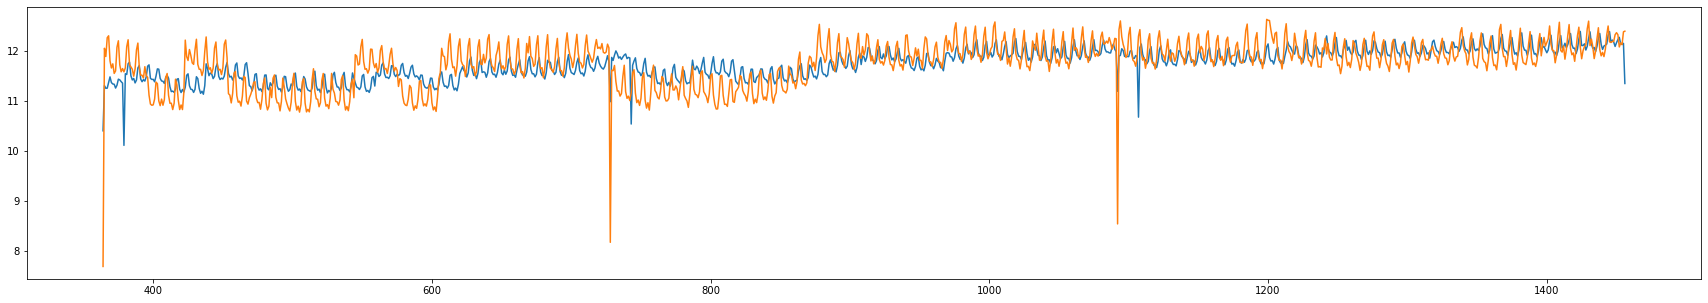

mean_squared_error: 0.1288335846500914


In [394]:
grtr_linear = beverages_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["y15"] = grtr_linear["sales"].shift(15)
grtr_linear["y365"] = grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
X = grtr_linear[["day","y15","y365"]]
X = sm.add_constant(X)
y = grtr_linear["sales"]
model_lin = sm.OLS(y.fillna(0),X)
result_lin = model_lin.fit()
print(result_lin.summary())
grtr_linear["estimate"] = (result_lin.params[0]+result_lin.params[1]*grtr_linear["day"]
                           +result_lin.params[2]*grtr_linear["y15"]+result_lin.params[3]*grtr_linear["y365"])
plt.figure(figsize = (30,5))
plt.figure(figsize = (30,5))
plt.plot(grtr_linear["estimate"])
plt.plot(y.fillna(0))
plt.show()
print("mean_squared_error: "+str(mean_squared_error(y.fillna(0),grtr_linear["estimate"])))

Figure(432x288)
Figure(432x288)


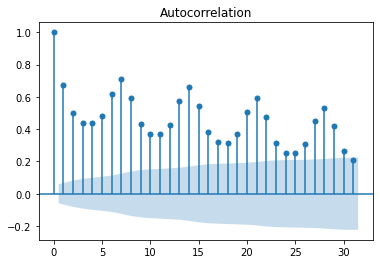

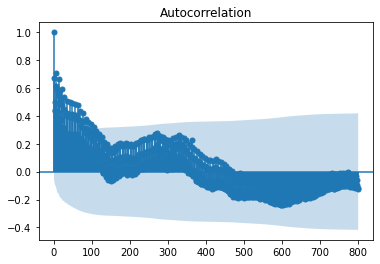

In [395]:
print(sm.graphics.tsa.plot_acf(grtr_linear["sales"].dropna()))

print(sm.graphics.tsa.plot_acf(grtr_linear["sales"].dropna(),lags = 800))


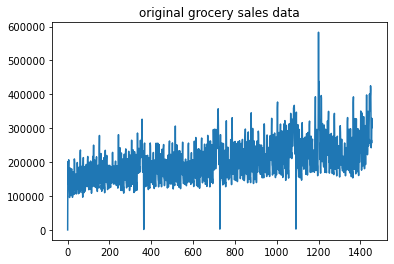

AUGMENTED DICKEY-FULLER TEST for: original beverages sales data
Test statistic  = -2.968
P-value = 0.038
Critical values :
	1%: -3.434921564946909 - The data is not stationary with 99% confidence
	5%: -2.8635590328954197 - The data is  stationary with 95% confidence
	10%: -2.567844919904611 - The data is  stationary with 90% confidence
 


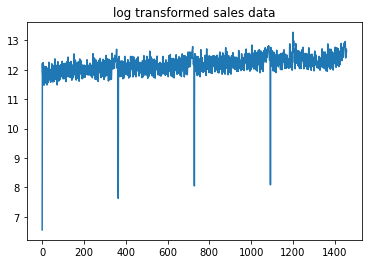

AUGMENTED DICKEY-FULLER TEST for: log transformed grocery  sales data
Test statistic  = -2.844
P-value = 0.052
Critical values :
	1%: -3.434918371231736 - The data is not stationary with 99% confidence
	5%: -2.8635576234668982 - The data is not stationary with 95% confidence
	10%: -2.5678441693558898 - The data is  stationary with 90% confidence
 


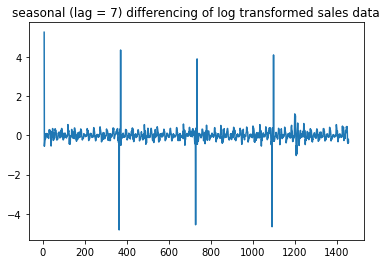

 
AUGMENTED DICKEY-FULLER TEST for: seasonal (lag = 7) differencing of log transformed sales data
Test statistic = -13.715
P-value = 0.000
Critical values :
	1%: -3.4349343845870006 - The data is  stationary with 99% confidence
	5%: -2.8635646903561653 - The data is  stationary with 95% confidence
	10%: -2.5678479326174157 - The data is  stationary with 90% confidence
 


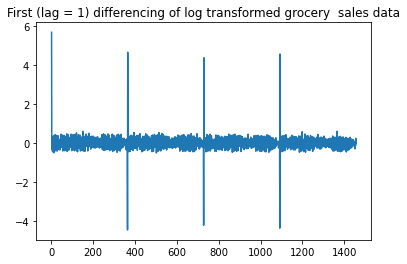

 
AUGMENTED DICKEY-FULLER TEST for: First (lag = 1) differencing of log transformed grocery  sales data
Test statistic = -12.844
P-value = 0.000
Critical values :
	1%: -3.434918371231736 - The data is  stationary with 99% confidence
	5%: -2.8635576234668982 - The data is  stationary with 95% confidence
	10%: -2.5678441693558898 - The data is  stationary with 90% confidence
 


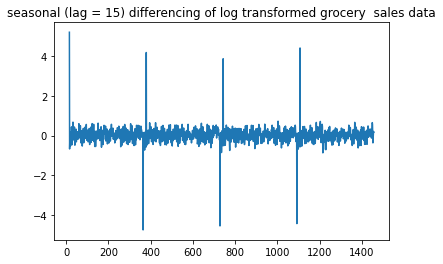

 
AUGMENTED DICKEY-FULLER TEST for: seasonal (lag = 15) differencing of log transformed grocery  sales data
Test statistic = -9.633
P-value = 0.000
Critical values :
	1%: -3.434973278556316 - The data is  stationary with 99% confidence
	5%: -2.8635818545830376 - The data is  stationary with 95% confidence
	10%: -2.567857072940785 - The data is  stationary with 90% confidence
 


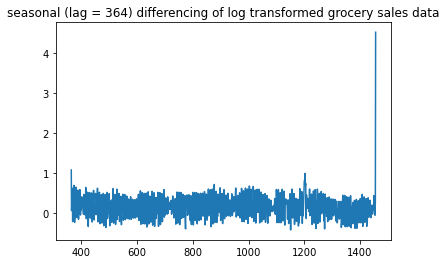

 
AUGMENTED DICKEY-FULLER TEST for: seasonal (lag = 364) differencing of log transformed grocery sales data
Test statistic = -2.993
P-value = 0.036
Critical values :
	1%: -3.436425000208065 - The data is not stationary with 99% confidence
	5%: -2.864222352544219 - The data is  stationary with 95% confidence
	10%: -2.5681981773275466 - The data is  stationary with 90% confidence
 


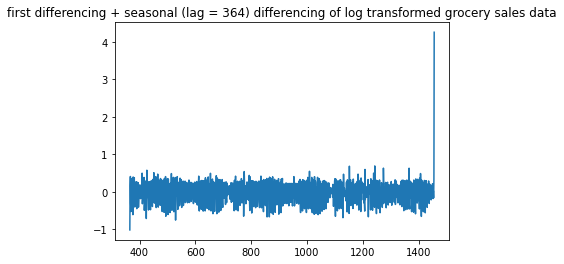

 
AUGMENTED DICKEY-FULLER TEST for: first differencing + seasonal (lag = 364) differencing of log transformed grocery sales data
Test statistic = -11.941
P-value = 0.000
Critical values :
	1%: -3.436425000208065 - The data is  stationary with 99% confidence
	5%: -2.864222352544219 - The data is  stationary with 95% confidence
	10%: -2.5681981773275466 - The data is  stationary with 90% confidence
 


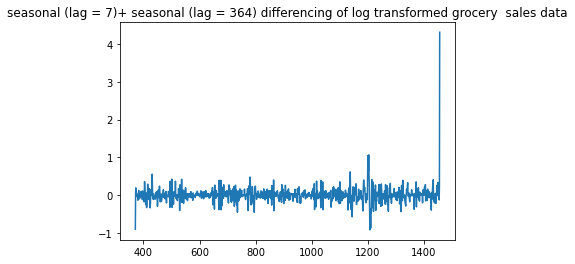

 
AUGMENTED DICKEY-FULLER TEST for: seasonal (lag = 7)+ seasonal (lag = 364) differencing of log transformed grocery  sales data
Test statistic = -5.538
P-value = 0.000
Critical values :
	1%: -3.436510851955201 - The data is  stationary with 99% confidence
	5%: -2.864260220574562 - The data is  stationary with 95% confidence
	10%: -2.5682183458999943 - The data is  stationary with 90% confidence
 


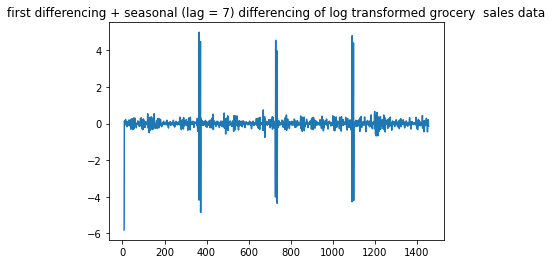

 
AUGMENTED DICKEY-FULLER TEST for: first differencing + seasonal (lag = 7) differencing of log transformed grocery  sales data
Test statistic = -14.913
P-value = 0.000
Critical values :
	1%: -3.434950510599593 - The data is  stationary with 99% confidence
	5%: -2.8635718069244227 - The data is  stationary with 95% confidence
	10%: -2.5678517223401403 - The data is  stationary with 90% confidence
 


In [406]:
grtr_linear = grocery_train.copy()



grtr_linear.dropna(inplace = True)
plt.title("original grocery sales data")
plt.plot(grtr_linear["sales"])
plt.show()
test = "original beverages sales data"
df = grtr_linear["sales"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic  = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

print(" ")



grtr_linear.dropna(inplace = True)
grtr_linear["sales"] = np.log(grtr_linear["sales"])
plt.title("log transformed sales data")
plt.plot(grtr_linear["sales"])
plt.show()
test = "log transformed grocery  sales data"
df = grtr_linear["sales"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic  = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")


test = "seasonal (lag = 7) differencing of log transformed sales data"
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(7)
grtr_linear.dropna(inplace = True)
plt.title(test)
plt.plot(grtr_linear["differenced"])
plt.show()
print(" ")
df = grtr_linear["differenced"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")



test = "First (lag = 1) differencing of log transformed grocery  sales data"
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(1)
grtr_linear.dropna(inplace = True)
plt.title(test)
plt.plot(grtr_linear["differenced"])
plt.show()
print(" ")
df = grtr_linear["differenced"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")

test = "seasonal (lag = 15) differencing of log transformed grocery  sales data"
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(15)
grtr_linear.dropna(inplace = True)
plt.title(test)
plt.plot(grtr_linear["differenced"])
plt.show()
print(" ")
df = grtr_linear["differenced"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")


test = "seasonal (lag = 364) differencing of log transformed grocery sales data"
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(364)
grtr_linear.dropna(inplace = True)
plt.title(test)
plt.plot(grtr_linear["differenced"])
plt.show()
print(" ")
df = grtr_linear["differenced"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")

test = "first differencing + seasonal (lag = 364) differencing of log transformed grocery sales data"
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(1)
grtr_linear["differenced"] = grtr_linear["differenced"] - grtr_linear["differenced"].shift(364)
grtr_linear.dropna(inplace = True)
plt.title(test)
plt.plot(grtr_linear["differenced"])
plt.show()
print(" ")
df = grtr_linear["differenced"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")


test = "seasonal (lag = 7)+ seasonal (lag = 364) differencing of log transformed grocery  sales data"
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(7)
grtr_linear["differenced"] = grtr_linear["differenced"] - grtr_linear["differenced"].shift(364)
grtr_linear.dropna(inplace = True)
plt.title(test)
plt.plot(grtr_linear["differenced"])
plt.show()
print(" ")
df = grtr_linear["differenced"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")

test = "first differencing + seasonal (lag = 7) differencing of log transformed grocery  sales data"
grtr_linear = grocery_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(7)
grtr_linear["differenced"] = grtr_linear["differenced"] - grtr_linear["differenced"].shift(1)
grtr_linear.dropna(inplace = True)
plt.title(test)
plt.plot(grtr_linear["differenced"])
plt.show()
print(" ")
df = grtr_linear["differenced"]
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")



## intuitive lags Chosen for beverages: differencing lag = 1, seasonal differencing lag = 364
## ACF plot backed lags chosen for beverages: differencing lag = 1, seasonal differencing lag = 7


Figure(432x288)


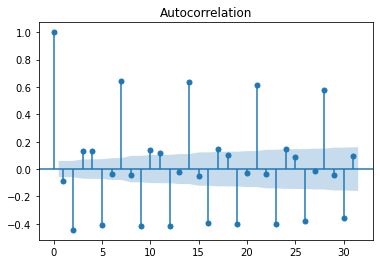

In [397]:
#differencing lag = 1, seasonal differencing lag = 364
grtr_linear = beverages_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(1)
series_beverages_1 = grtr_linear["differenced"] - grtr_linear["differenced"].shift(364)

print(sm.graphics.tsa.plot_acf(series_beverages_1.dropna()))


## series_beverages_1

In [353]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
my_order = (1,1,0)
my_seasonal_order = (1, 1, 0, 364)
model = SARIMAX(series_beverages_1 , order=my_order, seasonal_order=my_seasonal_order)

model_series_beverages_1 = model.fit()


print(model_fit.summary())

MemoryError: Unable to allocate 5.79 GiB for an array with shape (730, 730, 1458) and data type float64

Figure(432x288)


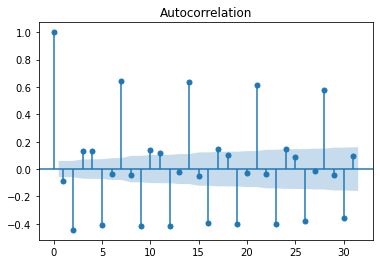

In [398]:
#differencing lag = 1, seasonal differencing lag = 364
grtr_linear = beverages_train.copy()
grtr_linear["sales"] = np.log(grtr_linear["sales"])
grtr_linear["differenced"] = grtr_linear["sales"] - grtr_linear["sales"].shift(1)
series_beverages_2 = grtr_linear["differenced"] - grtr_linear["differenced"].shift(7)

print(sm.graphics.tsa.plot_acf(series_beverages_1.dropna()))


## series_beverages_2  


In [399]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
my_order = (0,1,2)
my_seasonal_order = (0, 1,2, 7)
model = SARIMAX(series_beverages_2 , order=my_order, seasonal_order=my_seasonal_order)

model_series_beverages_2  = model.fit()


print(model_series_beverages_2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       differenced   No. Observations:                 1457
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 7)   Log Likelihood                -216.913
Date:                           Sun, 19 Dec 2021   AIC                            443.826
Time:                                   07:52:05   BIC                            470.219
Sample:                                        0   HQIC                           453.675
                                          - 1457                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.7451      0.009   -191.605      0.000      -1.763      -1.727
ma.L2          0.7465      0.008     95.764

AUGMENTED DICKEY-FULLER TEST for: residuals of SARIMAX(0, 1, 2)x(0, 1, 2, 7) for bread sales 
Test statistic = -8.734
P-value = 0.000
Critical values :
	1%: -3.4349376007389965 - The data is  stationary with 99% confidence
	5%: -2.8635661096787812 - The data is  stationary with 95% confidence
	10%: -2.567848688436159 - The data is  stationary with 90% confidence
 
Figure(432x288)
Figure(432x288)


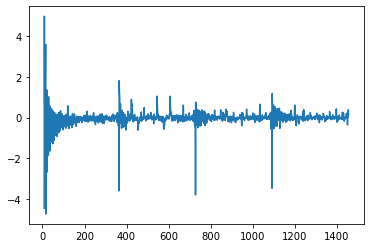

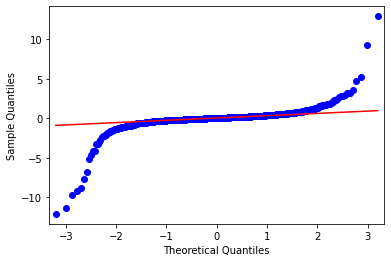

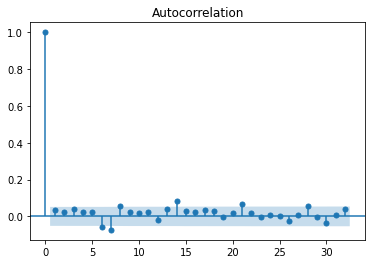

In [400]:

residbev2 = model_series_beverages_2.resid
plt.plot(residbev2 )
from statsmodels.graphics.api import qqplot

residual  = residbev2.dropna() 

test = "residuals of SARIMAX(0, 1, 2)x(0, 1, 2, 7) for bread sales "
df = residual
dftest = adfuller(df.dropna(), autolag='AIC')
print("AUGMENTED DICKEY-FULLER TEST for: " + test)
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
print(" ")
print(qqplot(residual, line="q", fit=True))
print(sm.graphics.tsa.plot_acf(residual))